In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import itertools
from scipy.stats import pearsonr

from fit import get_expectations_carrabin
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

### Model Performance (abs_qid_loss)

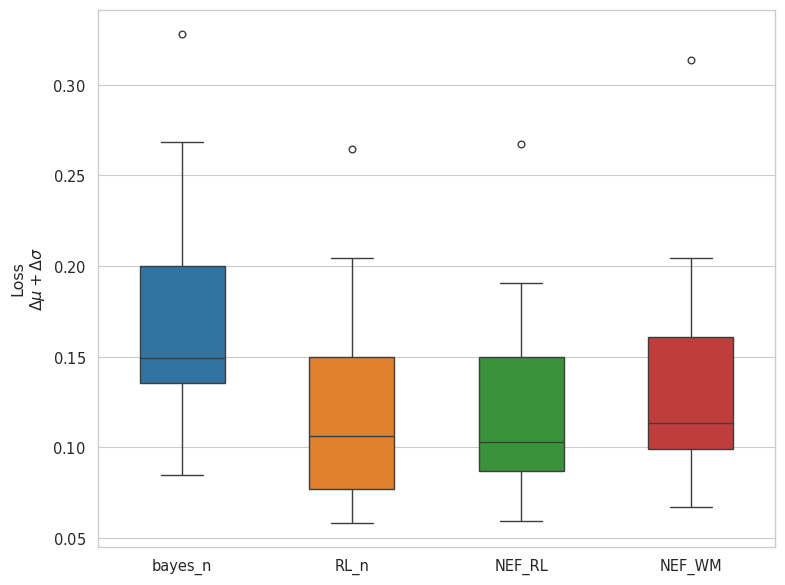

In [3]:
bayes_n = pd.read_pickle("data/bayes_n_carrabin_feb12_performance.pkl")
rl_n = pd.read_pickle("data/RL_n2_carrabin_feb12_performance.pkl")
# nef_rl = pd.read_pickle("data/NEF_RL_carrabin_feb12_performance.pkl")
# nef_rl2 = pd.read_pickle("data/NEF_RL_carrabin_feb17_performance.pkl")
nef_rl = pd.read_pickle("data/NEF_RL_carrabin_feb19_performance.pkl")
nef_wm = pd.read_pickle("data/NEF_WM_carrabin_feb19_performance.pkl")

rl_n['type'] = "RL_n"
combined = pd.concat([bayes_n, rl_n, nef_rl, nef_wm], ignore_index=True)

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), sharex=True, sharey='row')
    sns.boxplot(combined, x='type', y='loss', hue='type', ax=ax, palette=palette[:4], notch=False, width=0.5)
    ax.set(xlabel=None, ylabel='Loss\n'+'$\Delta \mu + \Delta \sigma$') 
    plt.tight_layout()
    fig.savefig("plots/carrabin_performance.jpg", dpi=600)